<a href="https://colab.research.google.com/github/rayeeed/UFP_Project/blob/main/AQ_Prediction_Dhaka_dataset_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
#from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import (HuberRegressor,
                              	RANSACRegressor, TheilSenRegressor)
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=b384769bd9cdfeee881dae6927224b1840aeac388bbe01f473662abcbc1c01ca
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/model_35_ID.xlsx', index_col='site_name')
df.drop(['latitude','longitude'],inplace= True, axis=1)

In [ ]:
df.head()

,Site_type,OID,Mean PNC (# / cm3),Mean PM2.5 (µg/m3)
site_name,,,,
Aftabnagar,Residential,5312,60300,105
Agashadek_road,Mixed,2814,60800,114
Airport,Mixed,9623,56900,90
Azimpur,Residential,3263,48400,73
Baridhara,Residential,7241,46000,107


<ipython-input-12-d1d4ae66c42e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Mean PM2.5 (µg/m3)', y='Site_type', inner='stick', palette='Dark2')


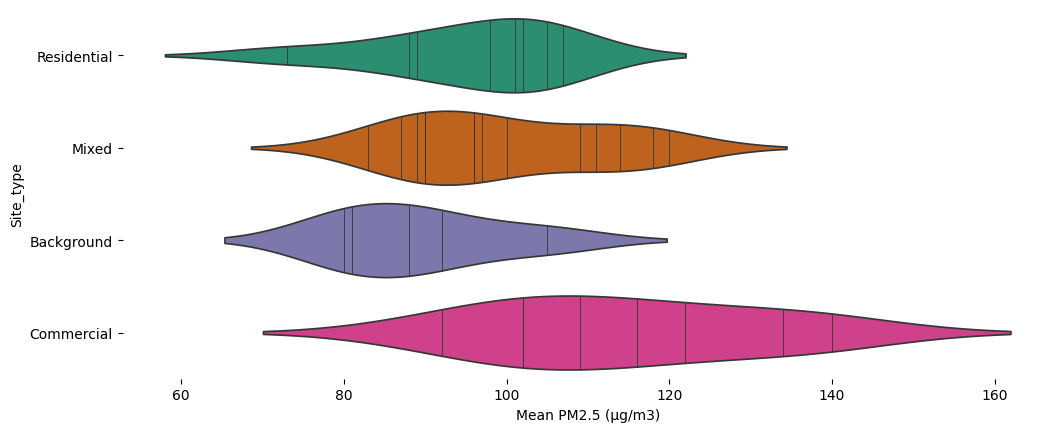

In [ ]:
# @title Site_type vs Mean PM2.5 (µg/m3)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Mean PM2.5 (µg/m3)', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-11-4750ac002a72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Mean PNC (# / cm3)        ', y='Site_type', inner='stick', palette='Dark2')


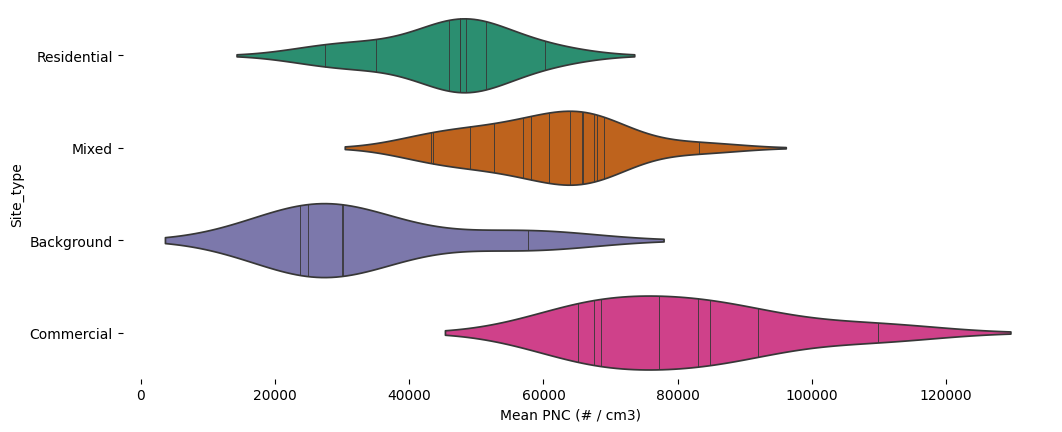

In [ ]:
# @title Site_type vs Mean PNC (# / cm3)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Mean PNC (# / cm3)        ', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

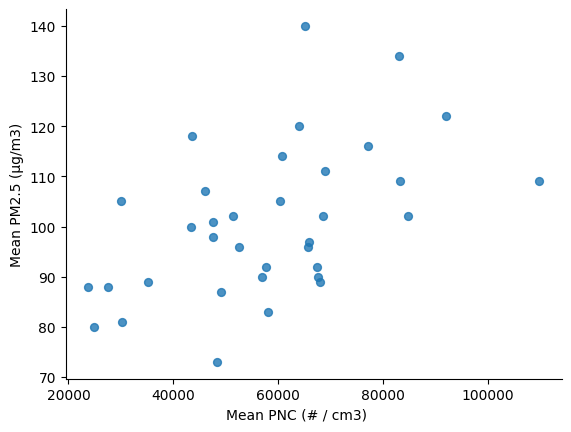

In [ ]:
# @title Mean PNC (# / cm3)         vs Mean PM2.5 (µg/m3)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Mean PNC (# / cm3)        ', y='Mean PM2.5 (µg/m3)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/model_49.xlsx', index_col='site_name')
df2.drop(['PNC','Site_type','Latitude','Longitude','OID_','land_Ar_A_50','land_Ar_A_100','land_Ar_A_150','land_Ar_A_250',
         'land_Ar_A_500','land_Ar_A_750','land_Ar_A_1000','land_Ar_A_1250','land_Ar_A_1500','land_Ar_A_2000','land_Ar_A_3000','land_Ar_A_5000','land_Ar_p_500','land_Ar_p_100',
         'land_Ar_p_150','land_Ar_p_250','land_Ar_p_750','land_Ar_p_1000','land_Ar_p_1250','land_Ar_p_1500'],inplace=True, axis=1)
cols_to_drop = [col for col in df2.columns if col.endswith('_50') or col.endswith('_p50') or col.endswith('_p2000') or col.endswith('_2000') or col.endswith('_3000') or col.endswith('_p3000') or col.endswith('_5000') or col.endswith('_p5000') ]
df2 = df2.drop(cols_to_drop, axis=1)

In [ ]:
merged_df = df.merge(df2, left_index=True, right_index=True)

In [ ]:
merged_df.shape

(35, 361)

In [ ]:
merged_df.head()

,Site_type,OID,Mean PNC (# / cm3),Mean PM2.5 (µg/m3),gsv_wall_p100,gsv_building_p100,gsv_house_p100,gsv_awning_p100,gsv_sky_p100,gsv_earth_p100,...,pop_1500,build_100,build_150,build_250,build_500,build_750,build_1000,build_1250,build_1500,distPrim
site_name,,,,,,,,,,,,,,,,,,,,,
Aftabnagar,Residential,5312,60300,105,3.690000,32.427500,0.257500,0.000000,39.310000,11.117500,...,256068,0,0,0,177,1753,5008,9487,14335,590.680143
Agashadek_road,Mixed,2814,60800,114,12.262500,39.130000,0.195000,0.002500,16.262500,0.995000,...,511400,205,462,1271,4565,8308,13048,18275,23737,2194.923354
Airport,Mixed,9623,56900,90,6.804568,33.023806,0.231656,0.096952,19.973174,3.473092,...,29525,6,17,59,264,607,1056,1617,2333,379.715085
Azimpur,Residential,3263,48400,73,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,380676,61,158,481,2006,4193,7766,12799,18346,716.846964
Baridhara,Residential,7241,46000,107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,97209,0,0,118,986,2476,4194,5965,7782,263.712339


In [ ]:
merged_df.to_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/model_35.xlsx', index=True)

In [ ]:
# Define the columns to keep in both dataframes
columns_to_keep = ['Site_type', 'OID', 'Mean PNC (# / cm3)', 'Mean PM2.5 (µg/m3)']

# Create dataframe with columns starting with 'gsv'
gsv_columns = [col for col in merged_df.columns if col.startswith('gsv')]
df_gsv = merged_df[columns_to_keep + gsv_columns]

# Create dataframe with columns not starting with 'gsv'
non_gsv_columns = [col for col in merged_df.columns if not col.startswith('gsv') and col not in columns_to_keep]
df_non_gsv = merged_df[columns_to_keep + non_gsv_columns]

In [ ]:
df_gsv

,Site_type,OID,Mean PNC (# / cm3),Mean PM2.5 (µg/m3),gsv_wall_p100,gsv_building_p100,gsv_house_p100,gsv_awning_p100,gsv_sky_p100,gsv_earth_p100,...,gsv_person_p1500,gsv_car_p1500,gsv_bus_p1500,gsv_truck_p1500,gsv_van_p1500,gsv_minibike_p1500,gsv_bicycle_p1500,gsv_signboard_p1500,gsv_trade_p1500,gsv_poster_p1500
site_name,,,,,,,,,,,,,,,,,,,,,
Aftabnagar,Residential,5312,60300,105,3.690000,32.427500,0.257500,0.000000,39.310000,11.117500,...,1.132458,0.740021,0.118814,0.033284,0.053411,0.017500,0.114004,1.073157,0.083178,0.055763
Agashadek_road,Mixed,2814,60800,114,12.262500,39.130000,0.195000,0.002500,16.262500,0.995000,...,1.825863,1.061511,0.358975,0.048273,0.122968,0.049514,0.259892,1.133813,0.105576,0.088183
Airport,Mixed,9623,56900,90,6.804568,33.023806,0.231656,0.096952,19.973174,3.473092,...,1.184423,1.160346,0.030346,0.027808,0.074038,0.016769,0.087269,0.629692,0.026346,0.069000
Azimpur,Residential,3263,48400,73,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.963141,1.017521,0.166453,0.029444,0.072051,0.038611,0.215406,1.186880,0.097415,0.129594
Baridhara,Residential,7241,46000,107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.732679,1.090911,0.021000,0.035393,0.038393,0.033893,0.064500,0.823571,0.058946,0.045268
BUET,Background,3176,24900,80,0.182500,20.430000,0.000000,0.000000,4.642500,9.255000,...,2.214313,0.961514,0.299261,0.043680,0.087746,0.081021,0.216901,0.940106,0.113187,0.080739
Chandrima_park,Background,5192,23800,88,1.992500,0.262500,0.000000,0.000000,40.265000,1.327500,...,0.972541,1.124773,0.075207,0.026446,0.082045,0.034174,0.097252,0.698843,0.025062,0.059649
Dhanmondi_lake_park,Background,4272,30200,81,0.300000,1.342500,0.002500,0.000000,17.132500,20.757500,...,1.214462,1.426440,0.025427,0.038703,0.058070,0.069256,0.173703,0.969668,0.086946,0.109335
Elephant_road,Mixed,3818,69000,111,0.070000,42.007500,0.000000,0.000000,9.602500,0.000000,...,2.014195,1.495453,0.153037,0.035973,0.052970,0.101711,0.220822,0.752768,0.078272,0.069295


from matplotlib import pyplot as plt
df_gsv['OID'].plot(kind='hist', bins=20, title='OID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['Mean PNC (# / cm3)'].plot(kind='hist', bins=20, title='Mean PNC (# / cm3)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['Mean PM2.5 (µg/m3)'].plot(kind='hist', bins=20, title='Mean PM2.5 (µg/m3)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['gsv_wall_p100'].plot(kind='hist', bins=20, title='gsv_wall_p100')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_gsv.groupby('Site_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv.plot(kind='scatter', x='OID', y='Mean PNC (# / cm3)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv.plot(kind='scatter', x='Mean PNC (# / cm3)', y='Mean PM2.5 (µg/m3)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv.plot(kind='scatter', x='Mean PM2.5 (µg/m3)', y='gsv_wall_p100', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv.plot(kind='scatter', x='gsv_wall_p100', y='gsv_building_p100', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['OID'].plot(kind='line', figsize=(8, 4), title='OID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['Mean PNC (# / cm3)'].plot(kind='line', figsize=(8, 4), title='Mean PNC (# / cm3)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['Mean PM2.5 (µg/m3)'].plot(kind='line', figsize=(8, 4), title='Mean PM2.5 (µg/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_gsv['gsv_wall_p100'].plot(kind='line', figsize=(8, 4), title='gsv_wall_p100')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_gsv, x='OID', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_gsv, x='Mean PNC (# / cm3)', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_gsv, x='Mean PM2.5 (µg/m3)', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_gsv, x='gsv_wall_p100', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df_non_gsv

,Site_type,OID,Mean PNC (# / cm3),Mean PM2.5 (µg/m3),land_Ar_IC_A_100,land_Ar_IC_p_100,land_Ar_MC_A_100,land_Ar_MC_p_100,land_Ar_UF_A_100,land_Ar_UF_p_100,...,pop_1500,build_100,build_150,build_250,build_500,build_750,build_1000,build_1250,build_1500,distPrim
site_name,,,,,,,,,,,,,,,,,,,,,
Aftabnagar,Residential,5312,60300,105,6290.169573,20.048389,1119.419409,3.567878,23965.348023,76.383733,...,256068,0,0,0,177,1753,5008,9487,14335,590.680143
Agashadek_road,Mixed,2814,60800,114,0.000000,0.000000,4830.756146,15.396863,26544.180906,84.603137,...,511400,205,462,1271,4565,8308,13048,18275,23737,2194.923354
Airport,Mixed,9623,56900,90,31374.937204,100.000000,0.000000,0.000000,0.000000,0.000000,...,29525,6,17,59,264,607,1056,1617,2333,379.715085
Azimpur,Residential,3263,48400,73,13534.829899,43.138986,0.000000,0.000000,0.000000,0.000000,...,380676,61,158,481,2006,4193,7766,12799,18346,716.846964
Baridhara,Residential,7241,46000,107,5676.504255,18.092480,0.000000,0.000000,19831.400514,63.207778,...,97209,0,0,118,986,2476,4194,5965,7782,263.712339
BUET,Background,3176,24900,80,31374.937115,100.000000,0.000000,0.000000,0.000000,0.000000,...,411174,25,72,248,1141,2886,6321,11954,19261,1185.004620
Chandrima_park,Background,5192,23800,88,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,260852,35,79,220,883,2121,4190,7330,12017,901.927929
Dhanmondi_lake_park,Background,4272,30200,81,1393.343542,4.440944,0.000000,0.000000,4205.605150,13.404346,...,331702,39,87,279,1332,3053,5919,10074,14998,1480.044252
Elephant_road,Mixed,3818,69000,111,10195.012157,32.494128,0.000000,0.000000,21179.925077,67.505872,...,275455,31,70,190,877,2499,4547,7573,11263,200.763541


from matplotlib import pyplot as plt
df_non_gsv['OID'].plot(kind='hist', bins=20, title='OID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv['Mean PNC (# / cm3)        '].plot(kind='hist', bins=20, title='Mean PNC (# / cm3)        ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv['Mean PM2.5 (µg/m3)'].plot(kind='hist', bins=20, title='Mean PM2.5 (µg/m3)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv['land_Ar_IC_A_100'].plot(kind='hist', bins=20, title='land_Ar_IC_A_100')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_non_gsv.groupby('Site_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv.plot(kind='scatter', x='OID', y='Mean PNC (# / cm3)        ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv.plot(kind='scatter', x='Mean PNC (# / cm3)        ', y='Mean PM2.5 (µg/m3)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv.plot(kind='scatter', x='Mean PM2.5 (µg/m3)', y='land_Ar_IC_A_100', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv.plot(kind='scatter', x='land_Ar_IC_A_100', y='land_Ar_IC_p_100', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RdL1_100']
  ys = series['OID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_non_gsv.sort_values('RdL1_100', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Site_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Site_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RdL1_100')
_ = plt.ylabel('OID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RdL1_100']
  ys = series['Mean PNC (# / cm3)        ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_non_gsv.sort_values('RdL1_100', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Site_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Site_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RdL1_100')
_ = plt.ylabel('Mean PNC (# / cm3)        ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RdL1_100']
  ys = series['Mean PM2.5 (µg/m3)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_non_gsv.sort_values('RdL1_100', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Site_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Site_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RdL1_100')
_ = plt.ylabel('Mean PM2.5 (µg/m3)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RdL1_100']
  ys = series['land_Ar_IC_A_100']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_non_gsv.sort_values('RdL1_100', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Site_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Site_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RdL1_100')
_ = plt.ylabel('land_Ar_IC_A_100')

from matplotlib import pyplot as plt
df_non_gsv['OID'].plot(kind='line', figsize=(8, 4), title='OID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv['Mean PNC (# / cm3)        '].plot(kind='line', figsize=(8, 4), title='Mean PNC (# / cm3)        ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv['Mean PM2.5 (µg/m3)'].plot(kind='line', figsize=(8, 4), title='Mean PM2.5 (µg/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_non_gsv['land_Ar_IC_A_100'].plot(kind='line', figsize=(8, 4), title='land_Ar_IC_A_100')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_non_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_non_gsv, x='OID', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_non_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_non_gsv, x='Mean PNC (# / cm3)        ', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_non_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_non_gsv, x='Mean PM2.5 (µg/m3)', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_non_gsv['Site_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_non_gsv, x='land_Ar_IC_A_100', y='Site_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
merged_df.head()

,Site_type,OID,Mean PNC (# / cm3),Mean PM2.5 (µg/m3),gsv_wall_p100,gsv_building_p100,gsv_house_p100,gsv_awning_p100,gsv_sky_p100,gsv_earth_p100,...,pop_1500,build_100,build_150,build_250,build_500,build_750,build_1000,build_1250,build_1500,distPrim
site_name,,,,,,,,,,,,,,,,,,,,,
Aftabnagar,Residential,5312,60300,105,3.690000,32.427500,0.257500,0.000000,39.310000,11.117500,...,256068,0,0,0,177,1753,5008,9487,14335,590.680143
Agashadek_road,Mixed,2814,60800,114,12.262500,39.130000,0.195000,0.002500,16.262500,0.995000,...,511400,205,462,1271,4565,8308,13048,18275,23737,2194.923354
Airport,Mixed,9623,56900,90,6.804568,33.023806,0.231656,0.096952,19.973174,3.473092,...,29525,6,17,59,264,607,1056,1617,2333,379.715085
Azimpur,Residential,3263,48400,73,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,380676,61,158,481,2006,4193,7766,12799,18346,716.846964
Baridhara,Residential,7241,46000,107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,97209,0,0,118,986,2476,4194,5965,7782,263.712339


In [ ]:

# Verify the column names
print(merged_df.columns)

Index(['Site_type', 'OID', 'Mean PNC (# / cm3)', 'Mean PM2.5 (µg/m3)',
       'gsv_wall_p100', 'gsv_building_p100', 'gsv_house_p100',
       'gsv_awning_p100', 'gsv_sky_p100', 'gsv_earth_p100',
       ...
       'pop_1500', 'build_100', 'build_150', 'build_250', 'build_500',
       'build_750', 'build_1000', 'build_1250', 'build_1500', 'distPrim'],
      dtype='object', length=361)
